In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
demand_data = pd.read_csv("PDB_Load_History.csv")
demand_data

,date,hour,day,weekday,month,year,temperature,demand
0,3/1/2003,1,1,7,3,2003,29,12863.0
1,3/1/2003,2,1,7,3,2003,28,12389.0
2,3/1/2003,3,1,7,3,2003,29,12155.0
3,3/1/2003,4,1,7,3,2003,27,12072.0
4,3/1/2003,5,1,7,3,2003,29,12160.0
...,...,...,...,...,...,...,...,...
103771,12/31/2014,20,31,4,12,2014,22,16955.0
103772,12/31/2014,21,31,4,12,2014,21,16243.0
103773,12/31/2014,22,31,4,12,2014,21,15525.0
103774,12/31/2014,23,31,4,12,2014,18,14759.0


In [4]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103776 entries, 0 to 103775
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         103776 non-null  object 
 1   hour         103776 non-null  int64  
 2   day          103776 non-null  int64  
 3   weekday      103776 non-null  int64  
 4   month        103776 non-null  int64  
 5   year         103776 non-null  int64  
 6   temperature  103776 non-null  int64  
 7   demand       103776 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 6.3+ MB


In [5]:
demand_data.describe()

,hour,day,weekday,month,year,temperature,demand
count,103776.00000,103776.000000,103776.000000,103776.000000,103776.000000,103776.000000,103776.000000
mean,12.50000,15.735661,3.999306,6.591813,2008.574699,50.576097,14674.947493
std,6.92222,8.802989,2.000183,3.420534,3.414726,18.300454,2894.544130
min,1.00000,1.000000,1.000000,1.000000,2003.000000,-7.000000,7794.000000
25%,6.75000,8.000000,2.000000,4.000000,2006.000000,36.000000,12514.000000
50%,12.50000,16.000000,4.000000,7.000000,2009.000000,51.000000,14773.000000
75%,18.25000,23.000000,6.000000,10.000000,2012.000000,65.000000,16443.000000
max,24.00000,31.000000,7.000000,12.000000,2014.000000,100.000000,27622.000000


In [6]:
demand_data.isnull().sum()

date           0
hour           0
day            0
weekday        0
month          0
year           0
temperature    0
demand         0
dtype: int64

In [7]:
# Convert the column datatype to datetime format

demand_data['LoadDate'] = pd.to_datetime(demand_data['date'])

In [8]:
demand_data = demand_data.set_index("LoadDate")

In [9]:
demand_data = demand_data.sort_index()


In [10]:
demand_data

,date,hour,day,weekday,month,year,temperature,demand
LoadDate,,,,,,,,
2003-03-01,3/1/2003,1,1,7,3,2003,29,12863.0
2003-03-01,3/1/2003,2,1,7,3,2003,28,12389.0
2003-03-01,3/1/2003,3,1,7,3,2003,29,12155.0
2003-03-01,3/1/2003,4,1,7,3,2003,27,12072.0
2003-03-01,3/1/2003,5,1,7,3,2003,29,12160.0
...,...,...,...,...,...,...,...,...
2014-12-31,12/31/2014,20,31,4,12,2014,22,16955.0
2014-12-31,12/31/2014,21,31,4,12,2014,21,16243.0
2014-12-31,12/31/2014,22,31,4,12,2014,21,15525.0


In [11]:
demand_data.insert(5, 'quarter', demand_data.index.quarter)

In [12]:
demand_data

,date,hour,day,weekday,month,quarter,year,temperature,demand
LoadDate,,,,,,,,,
2003-03-01,3/1/2003,1,1,7,3,1,2003,29,12863.0
2003-03-01,3/1/2003,2,1,7,3,1,2003,28,12389.0
2003-03-01,3/1/2003,3,1,7,3,1,2003,29,12155.0
2003-03-01,3/1/2003,4,1,7,3,1,2003,27,12072.0
2003-03-01,3/1/2003,5,1,7,3,1,2003,29,12160.0
...,...,...,...,...,...,...,...,...,...
2014-12-31,12/31/2014,20,31,4,12,4,2014,22,16955.0
2014-12-31,12/31/2014,21,31,4,12,4,2014,21,16243.0
2014-12-31,12/31/2014,22,31,4,12,4,2014,21,15525.0


In [13]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103776 entries, 2003-03-01 to 2014-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         103776 non-null  object 
 1   hour         103776 non-null  int64  
 2   day          103776 non-null  int64  
 3   weekday      103776 non-null  int64  
 4   month        103776 non-null  int64  
 5   quarter      103776 non-null  int32  
 6   year         103776 non-null  int64  
 7   temperature  103776 non-null  int64  
 8   demand       103776 non-null  float64
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 7.5+ MB


In [14]:
demand_data["demand"] = demand_data[['demand']].astype('int64')

In [15]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103776 entries, 2003-03-01 to 2014-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         103776 non-null  object
 1   hour         103776 non-null  int64 
 2   day          103776 non-null  int64 
 3   weekday      103776 non-null  int64 
 4   month        103776 non-null  int64 
 5   quarter      103776 non-null  int32 
 6   year         103776 non-null  int64 
 7   temperature  103776 non-null  int64 
 8   demand       103776 non-null  int64 
dtypes: int32(1), int64(7), object(1)
memory usage: 7.5+ MB


In [16]:
demand_data.insert(4, 'weekofyear', demand_data.index.isocalendar().week.astype(int))

In [17]:
demand_data = demand_data.drop(demand_data.columns[0], axis=1)

In [18]:
demand_data

,hour,day,weekday,weekofyear,month,quarter,year,temperature,demand
LoadDate,,,,,,,,,
2003-03-01,1,1,7,9,3,1,2003,29,12863
2003-03-01,2,1,7,9,3,1,2003,28,12389
2003-03-01,3,1,7,9,3,1,2003,29,12155
2003-03-01,4,1,7,9,3,1,2003,27,12072
2003-03-01,5,1,7,9,3,1,2003,29,12160
...,...,...,...,...,...,...,...,...,...
2014-12-31,20,31,4,1,12,4,2014,22,16955
2014-12-31,21,31,4,1,12,4,2014,21,16243
2014-12-31,22,31,4,1,12,4,2014,21,15525


In [19]:
demand_data.insert(6, 'is_weekend', demand_data.index.dayofweek >= 5)

In [20]:
demand_data["is_weekend"] = demand_data["is_weekend"].astype(int)

In [21]:
demand_data

,hour,day,weekday,weekofyear,month,quarter,is_weekend,year,temperature,demand
LoadDate,,,,,,,,,,
2003-03-01,1,1,7,9,3,1,1,2003,29,12863
2003-03-01,2,1,7,9,3,1,1,2003,28,12389
2003-03-01,3,1,7,9,3,1,1,2003,29,12155
2003-03-01,4,1,7,9,3,1,1,2003,27,12072
2003-03-01,5,1,7,9,3,1,1,2003,29,12160
...,...,...,...,...,...,...,...,...,...,...
2014-12-31,20,31,4,1,12,4,0,2014,22,16955
2014-12-31,21,31,4,1,12,4,0,2014,21,16243
2014-12-31,22,31,4,1,12,4,0,2014,21,15525


In [22]:
demand_data["demand_lag_24hr"] = demand_data["demand"].shift(24)

In [23]:
demand_data["demand_lag_168hr"] = demand_data["demand"].shift(168)

In [24]:
demand_data.head(100)

,hour,day,weekday,weekofyear,month,quarter,is_weekend,year,temperature,demand,demand_lag_24hr,demand_lag_168hr
LoadDate,,,,,,,,,,,,
2003-03-01,1,1,7,9,3,1,1,2003,29,12863,NaN,NaN
2003-03-01,2,1,7,9,3,1,1,2003,28,12389,NaN,NaN
2003-03-01,3,1,7,9,3,1,1,2003,29,12155,NaN,NaN
2003-03-01,4,1,7,9,3,1,1,2003,27,12072,NaN,NaN
2003-03-01,5,1,7,9,3,1,1,2003,29,12160,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2003-03-04,24,4,3,10,3,1,0,2003,30,13581,15059.0,NaN
2003-03-05,1,5,4,10,3,1,0,2003,31,12638,14222.0,NaN
2003-03-05,2,5,4,10,3,1,0,2003,31,12184,13870.0,NaN


## Rolling mean and rolling standard deviation

In [25]:
# Rolling mean and rolling standard deviation

demand_data["demand_rolling_mean_24hr"] = demand_data["demand"].rolling(window = 24).mean()

demand_data["demand_rolling_std_24hr"] = demand_data["demand"].rolling(window = 24).std()

In [26]:
demand_data

,hour,day,weekday,weekofyear,month,quarter,is_weekend,year,temperature,demand,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
LoadDate,,,,,,,,,,,,,,
2003-03-01,1,1,7,9,3,1,1,2003,29,12863,NaN,NaN,NaN,NaN
2003-03-01,2,1,7,9,3,1,1,2003,28,12389,NaN,NaN,NaN,NaN
2003-03-01,3,1,7,9,3,1,1,2003,29,12155,NaN,NaN,NaN,NaN
2003-03-01,4,1,7,9,3,1,1,2003,27,12072,NaN,NaN,NaN,NaN
2003-03-01,5,1,7,9,3,1,1,2003,29,12160,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,20,31,4,1,12,4,0,2014,22,16955,17912.0,14478.0,15452.791667,1779.253922
2014-12-31,21,31,4,1,12,4,0,2014,21,16243,17376.0,13995.0,15405.583333,1740.618778
2014-12-31,22,31,4,1,12,4,0,2014,21,15525,16458.0,13506.0,15366.708333,1726.453326


In [55]:
demand_data = demand_data.dropna().copy()

demand_data

,hour,day,weekday,weekofyear,month,quarter,is_weekend,year,temperature,demand,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
LoadDate,,,,,,,,,,,,,,
2003-03-08,1,8,7,10,3,1,1,2003,25,12788,13519.0,12863.0,15993.458333,1820.267514
2003-03-08,2,8,7,10,3,1,1,2003,26,12251,13181.0,12389.0,15954.708333,1891.257150
2003-03-08,3,8,7,10,3,1,1,2003,27,11974,13069.0,12155.0,15909.083333,1975.242416
2003-03-08,4,8,7,10,3,1,1,2003,27,11825,13138.0,12072.0,15854.375000,2071.183254
2003-03-08,5,8,7,10,3,1,1,2003,27,11881,13533.0,12160.0,15785.541667,2176.461188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,20,31,4,1,12,4,0,2014,22,16955,17912.0,14478.0,15452.791667,1779.253922
2014-12-31,21,31,4,1,12,4,0,2014,21,16243,17376.0,13995.0,15405.583333,1740.618778
2014-12-31,22,31,4,1,12,4,0,2014,21,15525,16458.0,13506.0,15366.708333,1726.453326


## Plotting 

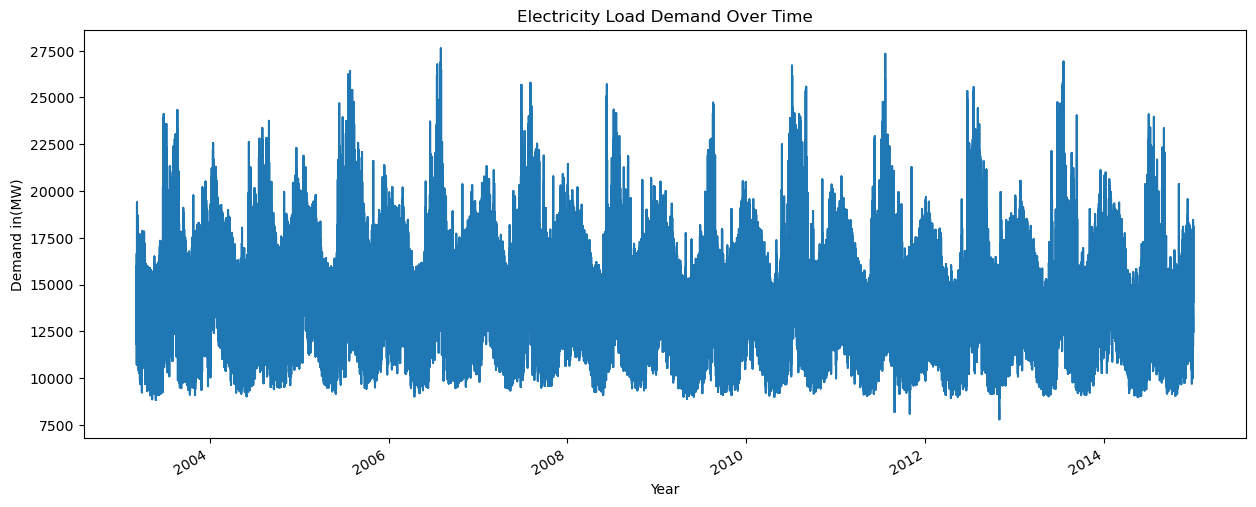

In [28]:
# plot demand over time

demand_data["demand"].plot(figsize = (15, 6), title = "Electricity Load Demand Over Time")
plt.xlabel("Year")
plt.ylabel("Demand in(MW)")
plt.show()

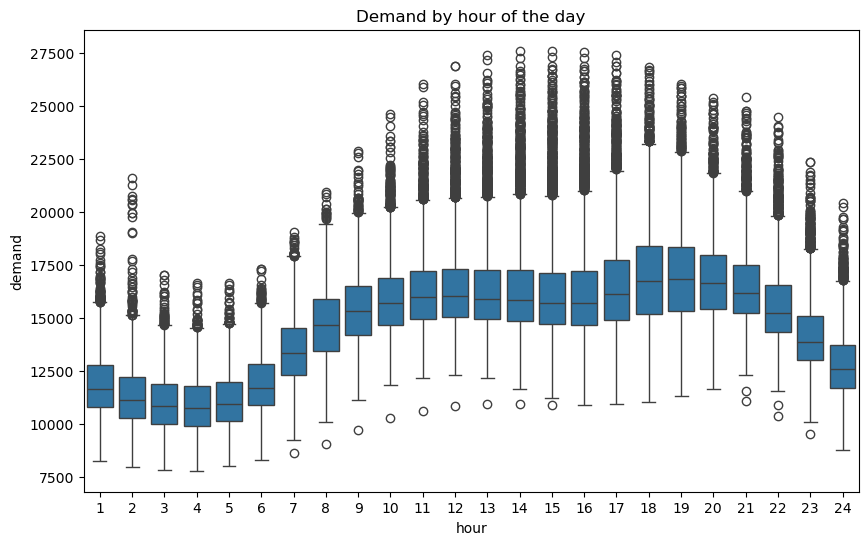

In [29]:
# Visualize

plt.figure(figsize = (10, 6))
sns.boxplot(data = demand_data, x = "hour", y = "demand")
plt.title("Demand by hour of the day")
plt.show()


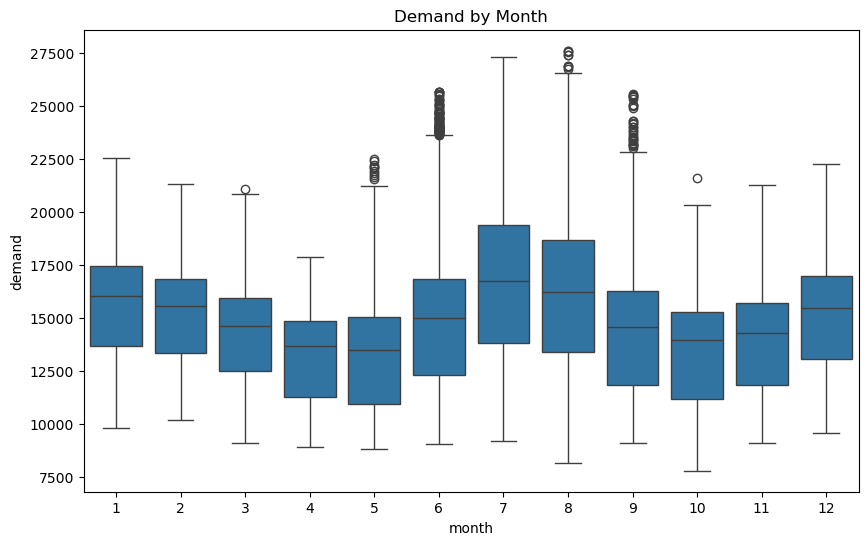

In [30]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = demand_data, x = "month", y = "demand")
plt.title("Demand by Month")
plt.show()


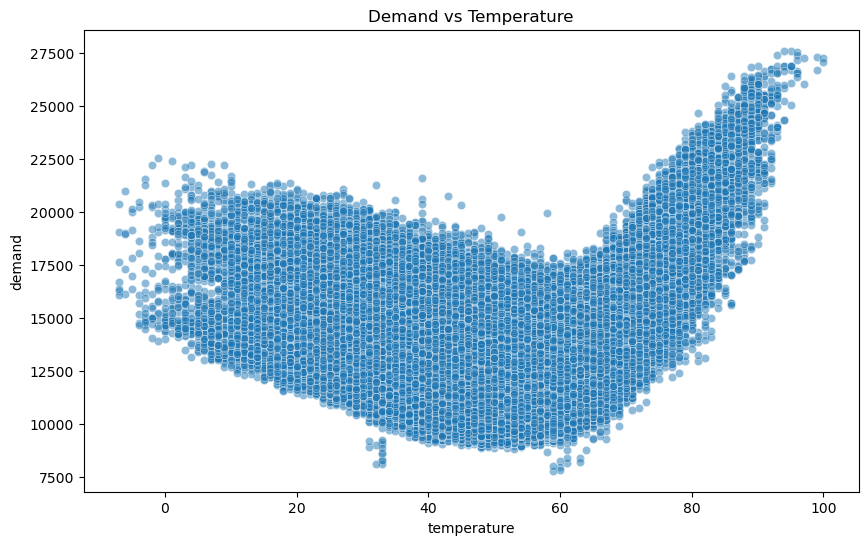

In [31]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = demand_data, x = "temperature", y = "demand", alpha = 0.5)
plt.title("Demand vs Temperature")
plt.show()


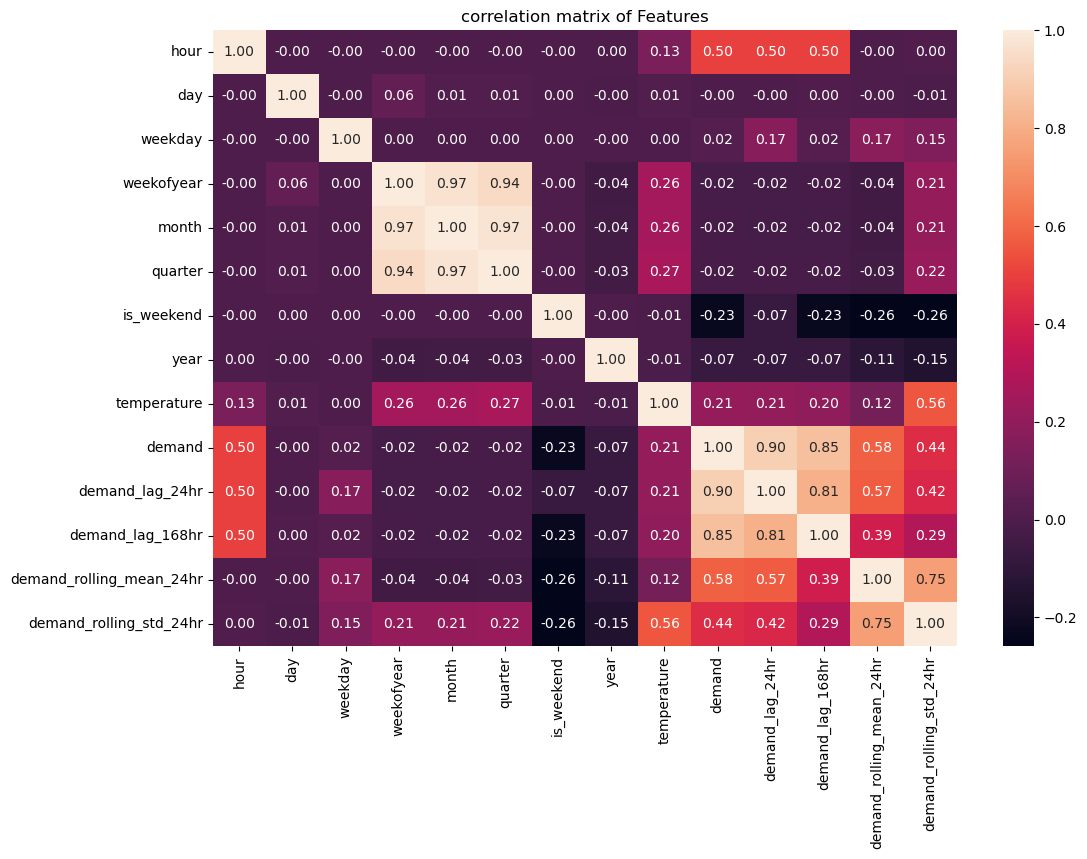

,hour,day,weekday,weekofyear,month,quarter,is_weekend,year,temperature,demand,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
hour,1.000000e+00,-1.257299e-17,-1.806081e-18,-3.175377e-16,-3.491468e-16,-3.281183e-16,-3.794847e-18,2.019983e-15,0.133846,0.500247,0.500215,0.500182,-0.000028,0.004989
day,-1.257299e-17,1.000000e+00,-6.284354e-04,6.248802e-02,7.644207e-03,8.588821e-03,1.207075e-03,-4.817011e-03,0.006778,-0.002456,-0.000765,0.004413,-0.002575,-0.006713
weekday,-1.806081e-18,-6.284354e-04,1.000000e+00,6.021778e-04,6.024794e-04,1.001265e-03,2.198074e-04,-2.461786e-04,0.000024,0.021235,0.173617,0.021446,0.174640,0.145424
weekofyear,-3.175377e-16,6.248802e-02,6.021778e-04,1.000000e+00,9.678912e-01,9.435494e-01,-6.667619e-05,-3.964527e-02,0.257072,-0.023045,-0.024055,-0.022437,-0.039205,0.211943
month,-3.491468e-16,7.644207e-03,6.024794e-04,9.678912e-01,1.000000e+00,9.708461e-01,-1.421703e-03,-3.563127e-02,0.255972,-0.022729,-0.023414,-0.023525,-0.038084,0.212465
quarter,-3.281183e-16,8.588821e-03,1.001265e-03,9.435494e-01,9.708461e-01,1.000000e+00,-1.394264e-03,-3.389006e-02,0.267126,-0.020059,-0.020981,-0.021259,-0.033818,0.218466
is_weekend,-3.794847e-18,1.207075e-03,2.198074e-04,-6.667619e-05,-1.421703e-03,-1.394264e-03,1.000000e+00,-6.515322e-04,-0.005825,-0.229420,-0.067422,-0.229617,-0.256869,-0.258871
year,2.019983e-15,-4.817011e-03,-2.461786e-04,-3.964527e-02,-3.563127e-02,-3.389006e-02,-6.515322e-04,1.000000e+00,-0.010408,-0.067970,-0.068205,-0.067775,-0.113283,-0.150103
temperature,1.338460e-01,6.778286e-03,2.385829e-05,2.570724e-01,2.559724e-01,2.671257e-01,-5.824944e-03,-1.040778e-02,1.000000,0.209420,0.206695,0.197492,0.116462,0.555898
demand,5.002467e-01,-2.455848e-03,2.123522e-02,-2.304510e-02,-2.272938e-02,-2.005862e-02,-2.294199e-01,-6.797025e-02,0.209420,1.000000,0.904427,0.854772,0.577818,0.442113


In [32]:
# correlation matrix

plt.figure(figsize = (12, 8))
sns.heatmap(demand_data.corr(), annot = True, fmt=".2f")
plt.title("correlation matrix of Features")
plt.show()

demand_data.corr()

In [33]:
demand_data

,hour,day,weekday,weekofyear,month,quarter,is_weekend,year,temperature,demand,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
LoadDate,,,,,,,,,,,,,,
2003-03-08,1,8,7,10,3,1,1,2003,25,12788,13519.0,12863.0,15993.458333,1820.267514
2003-03-08,2,8,7,10,3,1,1,2003,26,12251,13181.0,12389.0,15954.708333,1891.257150
2003-03-08,3,8,7,10,3,1,1,2003,27,11974,13069.0,12155.0,15909.083333,1975.242416
2003-03-08,4,8,7,10,3,1,1,2003,27,11825,13138.0,12072.0,15854.375000,2071.183254
2003-03-08,5,8,7,10,3,1,1,2003,27,11881,13533.0,12160.0,15785.541667,2176.461188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,20,31,4,1,12,4,0,2014,22,16955,17912.0,14478.0,15452.791667,1779.253922
2014-12-31,21,31,4,1,12,4,0,2014,21,16243,17376.0,13995.0,15405.583333,1740.618778
2014-12-31,22,31,4,1,12,4,0,2014,21,15525,16458.0,13506.0,15366.708333,1726.453326


In [34]:
feature_cols = [
    'hour', 'month', 'weekofyear', 'quarter', 'is_weekend',
    'demand_lag_24hr', 'demand_lag_168hr',
    'demand_rolling_mean_24hr', 'demand_rolling_std_24hr'
]

## Spliting Data

In [35]:
X = demand_data[feature_cols]
Y = demand_data["demand"]

In [36]:
split = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
Y_train, Y_test = Y.iloc[:split], Y.iloc[split:]

In [37]:
print(X_train.shape)

(82886, 9)


In [38]:
print(X_test.shape)

(20722, 9)


## XGBoost

In [39]:
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [4, 6],
    'model__subsample': [0.8],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

In [41]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])


In [42]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


,estimator,"Pipeline(step...te=42, ...))])"
,param_grid,"{'model__colsample_bytree': [0.6, 0.8, ...], 'model__learning_rate': [0.01, 0.1, ...], 'model__max_depth': [4, 6], 'model__n_estimators': [100, 200, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [43]:
# Print the best parameters and score
print(f"Best parameters found: {grid_search.best_params_}");
print(f"Best negative MSE found: {grid_search.best_score_}");

# Get the best model
best_xgb_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))

Best parameters found: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 300, 'model__subsample': 0.8}
Best negative MSE found: -214286.17708333334
Best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 300, 'model__subsample': 0.8}
Best CV RMSE: 462.91054976456667


### Extract the Final Model

In [44]:
y_pred = best_xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(Y_test, y_pred))
mae_xgb = mean_absolute_error(Y_test, y_pred)
r2_xgb = r2_score(Y_test, y_pred)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost MAE:", mae_xgb)
print("XGBoost R²:", r2_xgb)


XGBoost RMSE: 457.4119963173244
XGBoost MAE: 338.4196472167969
XGBoost R²: 0.9726006388664246


In [45]:
prediction_xgb = best_xgb_model

### Feature Importance

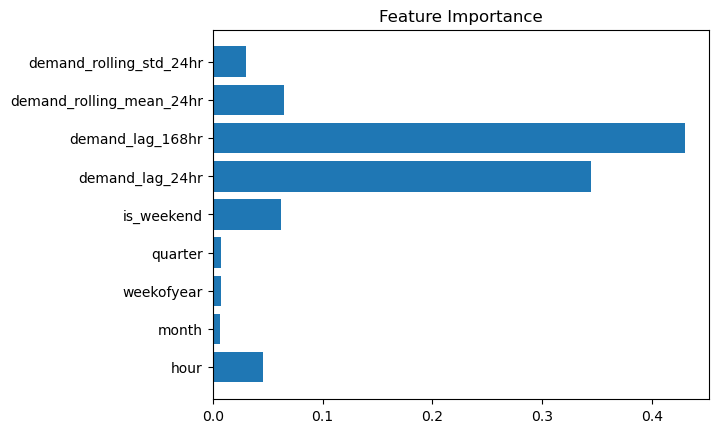

In [46]:
import matplotlib.pyplot as plt

# Extract the model from the pipeline
final_xgb = best_xgb_model.named_steps['model']
features = X_train.columns

importance = final_xgb.feature_importances_

plt.barh(features, importance)
plt.title("Feature Importance")
plt.show()


In [47]:
print(demand_data.columns)

Index(['hour', 'day', 'weekday', 'weekofyear', 'month', 'quarter',
       'is_weekend', 'year', 'temperature', 'demand', 'demand_lag_24hr',
       'demand_lag_168hr', 'demand_rolling_mean_24hr',
       'demand_rolling_std_24hr'],
      dtype='object')


In [48]:
best_pipeline = grid_search.best_estimator_

import joblib
joblib.dump(best_pipeline, 'xgb_tuned_load_forecast_model_.pkl')


['xgb_tuned_load_forecast_model_.pkl']

In [49]:
df = demand_data.copy()

df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['is_weekend'] = (df.index.weekday >= 5).astype(int)

df['demand_lag_24'] = df['demand'].shift(24)
df['demand_lag_168'] = df['demand'].shift(168)
df['demand_roll_mean_24'] = df['demand'].rolling(24).mean()
df['demand_roll_std_24'] = df['demand'].rolling(24).std()

df = df.dropna()


In [50]:

df

,hour,day,weekday,weekofyear,month,quarter,is_weekend,year,temperature,demand,demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr,demand_lag_24,demand_lag_168,demand_roll_mean_24,demand_roll_std_24
LoadDate,,,,,,,,,,,,,,,,,,
2003-03-15,0,15,7,11,3,1,1,2003,25,12645,12876.0,12788.0,15628.375000,1897.500182,12876.0,12788.0,15628.375000,1897.500182
2003-03-15,0,15,7,11,3,1,1,2003,26,12136,12567.0,12251.0,15610.416667,1929.503043,12567.0,12251.0,15610.416667,1929.503043
2003-03-15,0,15,7,11,3,1,1,2003,26,11856,12452.0,11974.0,15585.583333,1975.214175,12452.0,11974.0,15585.583333,1975.214175
2003-03-15,0,15,7,11,3,1,1,2003,26,11718,12501.0,11825.0,15552.958333,2033.970576,12501.0,11825.0,15552.958333,2033.970576
2003-03-15,0,15,7,11,3,1,1,2003,26,11778,12853.0,11881.0,15508.166667,2106.555186,12853.0,11881.0,15508.166667,2106.555186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,0,31,4,1,12,4,0,2014,22,16955,17912.0,14478.0,15452.791667,1779.253922,17912.0,14478.0,15452.791667,1779.253922
2014-12-31,0,31,4,1,12,4,0,2014,21,16243,17376.0,13995.0,15405.583333,1740.618778,17376.0,13995.0,15405.583333,1740.618778
2014-12-31,0,31,4,1,12,4,0,2014,21,15525,16458.0,13506.0,15366.708333,1726.453326,16458.0,13506.0,15366.708333,1726.453326


In [51]:
target_col = 'demand'

feature_cols = [
    'hour', 'month', 'weekofyear', 'quarter', 'is_weekend',
    'demand_lag_24hr', 'demand_lag_168hr',
    'demand_rolling_mean_24hr', 'demand_rolling_std_24hr'
]


In [52]:
X = df[feature_cols]
y = df[target_col]

prediction_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])

prediction_xgb.fit(X, y)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None


In [56]:
from collections import deque

def forecast_future_xgb_fast(model, history, horizon=24):

    hist = history.copy()

    # Buffers for lags / rolling (initialized from history)
    lag_24 = deque(hist["demand"].iloc[-24:], maxlen=24)
    lag_168 = deque(hist["demand"].iloc[-168:], maxlen=168)

    roll_24 = deque(hist["demand"].iloc[-24:], maxlen=24)

    preds = []

    last_time = hist.index[-1]

    for step in range(horizon):

        next_time = last_time + pd.Timedelta(hours=1)

        hour = next_time.hour
        month = next_time.month
        weekofyear = int(next_time.isocalendar().week)
        quarter = next_time.quarter
        is_weekend = int(next_time.dayofweek >= 5)

        row = pd.DataFrame([{
            "hour": hour,
            "month": month,
            "weekofyear": weekofyear,
            "quarter": quarter,
            "is_weekend": is_weekend,
            "demand_lag_24hr": lag_24[0],
            "demand_lag_168hr": lag_168[0],
            "demand_rolling_mean_24hr": np.mean(roll_24),
            "demand_rolling_std_24hr": np.std(roll_24)
        }])

        y_pred = model.predict(row)[0]
        preds.append(y_pred)

        # Update buffers
        lag_24.append(y_pred)
        lag_168.append(y_pred)
        roll_24.append(y_pred)

        last_time = next_time

    future_index = pd.date_range(
        start=history.index[-1] + pd.Timedelta(hours=1),
        periods=horizon,
        freq="H"
    )

    return pd.DataFrame({"demand": preds}, index=future_index)


In [54]:
future_demand = forecast_future_xgb(demand_data, best_xgb_model, feature_cols, horizon=24)
print(future_demand)

[np.float32(13690.804), np.float32(13521.659), np.float32(13620.176), np.float32(13550.289), np.float32(13670.035), np.float32(13668.511), np.float32(13789.331), np.float32(14447.26), np.float32(13829.91), np.float32(14028.113), np.float32(13741.923), np.float32(13818.979), np.float32(13959.699), np.float32(13868.97), np.float32(13847.296), np.float32(13713.575), np.float32(13403.794), np.float32(13370.342), np.float32(13072.322), np.float32(13204.297), np.float32(13538.095), np.float32(13115.9), np.float32(12844.007), np.float32(13323.9795)]
